#### Marut Priyadarshi
#### DSE 2019
#### 19191
#### DSML Project

In [76]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import mutual_info_classif
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB
import pickle
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler,RobustScaler, MinMaxScaler

In [77]:
x=pd.read_csv('music30s_trainin.csv')
labels=pd.read_csv('music30s_trainlabel.csv')
le=LabelEncoder()
y=le.fit_transform(labels.iloc[:,1])
yc=y
y=pd.DataFrame({'label':y})
data=pd.concat([x,y])


C:\Users\ASUS\AppData\Local\Temp/ipykernel_8116/1200867342.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x,y)


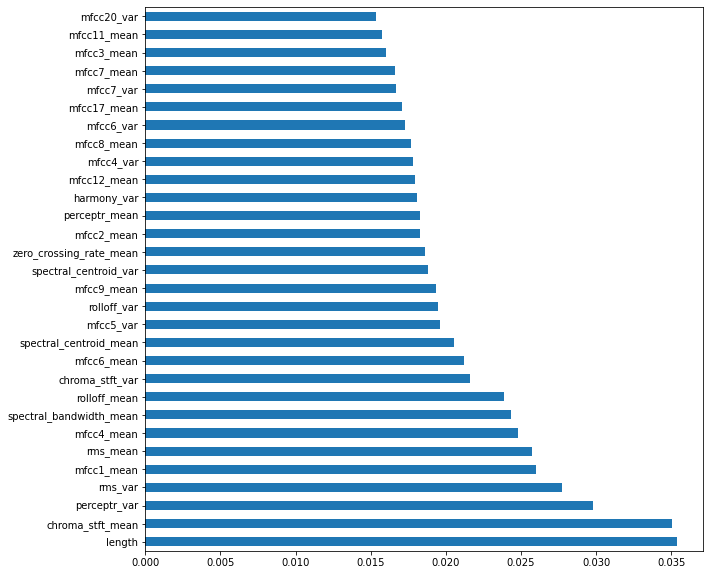

In [78]:
model = ExtraTreesClassifier(random_state=42)
model.fit(x,y)
#use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
plt.figure(figsize=(10,10))
feat_importances.nlargest(30).plot(kind='barh')
plt.show()

C:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


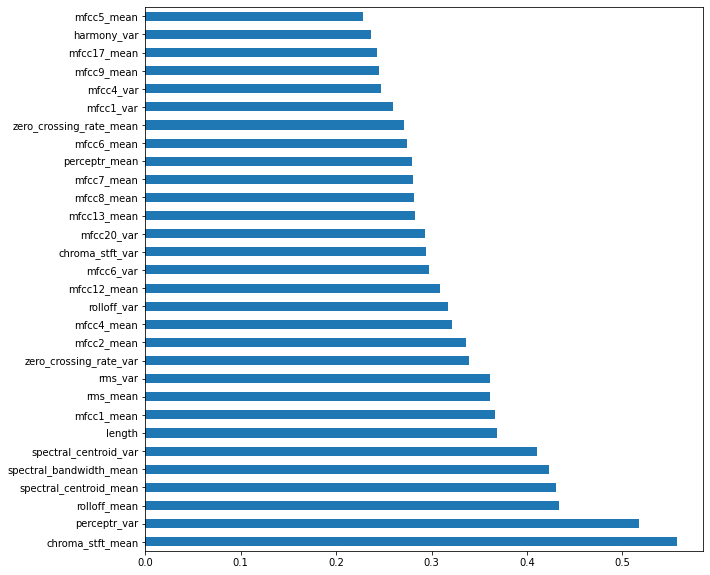

In [79]:
x1=pd.Series(mutual_info_classif(x,y, random_state=42), index=x.columns)
plt.figure(figsize=(10,10))
x1.nlargest(30).plot(kind='barh')
plt.show()

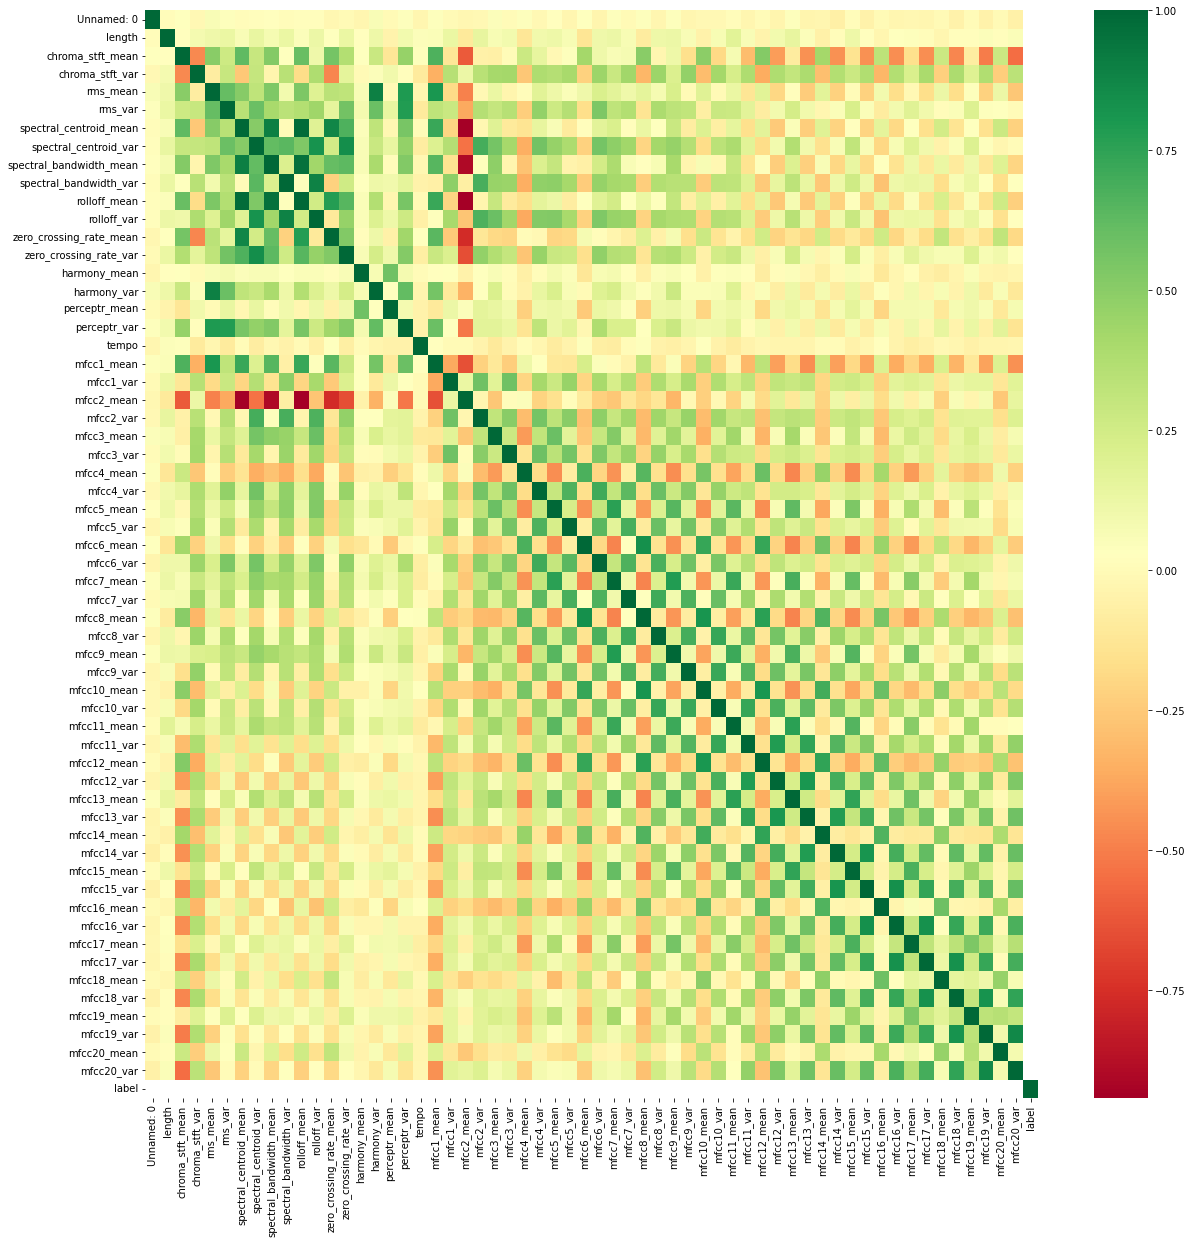

In [80]:
corrmat = data.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corrmat,cmap="RdYlGn")
plt.show()

In [81]:
c=x.corr()
#looking for positive correlation
#the features only occuring in feature importance
print(c.loc['mfcc11_mean'][c.loc['mfcc11_mean'] > 0.75])
print(c.loc['mfcc3_mean'][c.loc['mfcc3_mean'] > 0.75])
print(c.loc['mfcc7_var'][c.loc['mfcc7_var'] > 0.75])
print(c.loc['mfcc4_var'][c.loc['mfcc4_var'] > 0.75])
print(c.loc['mfcc5_var'][c.loc['mfcc5_var'] > 0.75])
# the features only occuring in mutual_info_classif
print(c.loc['zero_crossing_rate_var'][c.loc['zero_crossing_rate_var'] > 0.75])
print(c.loc['mfcc1_var'][c.loc['mfcc1_var'] > 0.75])
print(c.loc['mfcc17_mean'][c.loc['mfcc17_mean'] > 0.75])
print(c.loc['mfcc5_mean'][c.loc['mfcc5_mean'] > 0.75])

#thus, we end up with 32 features out of 59 to finally train our classifier with.

mfcc11_mean    1.000000
mfcc13_mean    0.759363
Name: mfcc11_mean, dtype: float64
mfcc3_mean    1.0
Name: mfcc3_mean, dtype: float64
mfcc7_var    1.0
Name: mfcc7_var, dtype: float64
mfcc4_var    1.0
Name: mfcc4_var, dtype: float64
mfcc5_var    1.0
Name: mfcc5_var, dtype: float64
spectral_centroid_var     0.846002
zero_crossing_rate_var    1.000000
Name: zero_crossing_rate_var, dtype: float64
mfcc1_var    1.0
Name: mfcc1_var, dtype: float64
mfcc17_mean    1.0
Name: mfcc17_mean, dtype: float64
mfcc5_mean    1.000000
mfcc7_mean    0.763424
Name: mfcc5_mean, dtype: float64


In [82]:
#checking for negative correlation

#the features only occuring in feature importance
print(c.loc['mfcc11_mean'][c.loc['mfcc11_mean'] < -0.75])
print(c.loc['mfcc3_mean'][c.loc['mfcc3_mean'] < -0.75])
print(c.loc['mfcc7_var'][c.loc['mfcc7_var'] < -0.75])
print(c.loc['mfcc4_var'][c.loc['mfcc4_var'] < -0.75])
print(c.loc['mfcc5_var'][c.loc['mfcc5_var'] < -0.75])
# the features only occuring in mutual_info_classif
print(c.loc['zero_crossing_rate_var'][c.loc['zero_crossing_rate_var'] < -0.75])
print(c.loc['mfcc1_var'][c.loc['mfcc1_var'] < -0.75])
print(c.loc['mfcc17_mean'][c.loc['mfcc17_mean'] < -0.75])
print(c.loc['mfcc5_mean'][c.loc['mfcc5_mean'] < -0.75])

Series([], Name: mfcc11_mean, dtype: float64)
Series([], Name: mfcc3_mean, dtype: float64)
Series([], Name: mfcc7_var, dtype: float64)
Series([], Name: mfcc4_var, dtype: float64)
Series([], Name: mfcc5_var, dtype: float64)
Series([], Name: zero_crossing_rate_var, dtype: float64)
Series([], Name: mfcc1_var, dtype: float64)
Series([], Name: mfcc17_mean, dtype: float64)
Series([], Name: mfcc5_mean, dtype: float64)


In [83]:
# making a dataframe of all the selected features
xc=x[['chroma_stft_mean','length','perceptr_var','rolloff_mean','spectral_centroid_mean','spectral_bandwidth_mean','spectral_centroid_var','mfcc1_mean','rms_mean','rms_var','mfcc2_mean','mfcc4_mean','rolloff_var','mfcc12_mean','mfcc6_var','chroma_stft_var','mfcc20_var','mfcc8_mean','mfcc7_mean','perceptr_mean','mfcc6_mean','zero_crossing_rate_mean','mfcc4_var','mfcc9_mean','harmony_var','mfcc11_mean','mfcc3_mean','mfcc7_var','mfcc4_var','mfcc5_var','mfcc1_var','mfcc17_mean']].copy()
xc

,chroma_stft_mean,length,perceptr_var,rolloff_mean,spectral_centroid_mean,spectral_bandwidth_mean,spectral_centroid_var,mfcc1_mean,rms_mean,rms_var,...,mfcc4_var,mfcc9_mean,harmony_var,mfcc11_mean,mfcc3_mean,mfcc7_var,mfcc4_var,mfcc5_var,mfcc1_var,mfcc17_mean
0,0.432846,661504,0.009514,6574.771380,3089.637185,2973.703815,1.311379e+06,-94.209412,0.142929,0.004758,...,506.841248,-6.113925,0.008987,0.332029,4.029281,189.074081,506.841248,393.235138,6272.106934,-5.005428
1,0.398761,661504,0.002661,4306.240937,2170.544505,2054.465986,2.470449e+05,-138.122055,0.092221,0.001716,...,261.225220,-2.105261,0.004687,4.206286,-35.343781,141.449295,261.225220,355.050415,2624.332764,-7.947048
2,0.375874,661794,0.003022,4580.418732,2321.871533,2545.325000,5.433791e+05,-120.392059,0.099977,0.001147,...,298.257599,-14.665573,0.005084,-2.363255,-6.029607,80.607040,298.257599,226.056030,1672.984131,-3.584000
3,0.424385,661794,0.010393,3828.288761,1886.954809,1913.258610,2.533910e+05,-92.703461,0.175975,0.003569,...,331.039490,-8.203340,0.014277,-5.647607,-35.067982,149.097458,331.039490,301.549194,3131.187744,-6.554968
4,0.456134,661794,0.002530,4186.459372,2269.128009,1928.953538,1.357942e+05,-100.384117,0.097609,0.000364,...,113.169205,-19.065331,0.004224,-13.772540,-57.247860,110.296234,113.169205,93.510063,1325.951050,-12.668804
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,0.469879,661504,0.009818,5796.886499,2868.233682,2676.125867,1.353624e+06,-127.277176,0.144261,0.008266,...,266.928986,4.607176,0.013576,5.581950,4.438226,146.197754,266.928986,186.883072,4943.034180,-5.572653
896,0.290960,661794,0.001711,2243.341758,1109.352784,1463.217702,1.386997e+05,-249.284561,0.089215,0.003113,...,298.369965,1.412567,0.006751,-0.981921,0.671435,96.463455,298.369965,183.418121,3980.260986,-2.823469
897,0.454745,661504,0.025124,6616.305648,3123.151410,2970.246872,9.471130e+05,-42.758705,0.223571,0.013054,...,345.183136,3.192147,0.018758,-4.768050,4.770786,198.291672,345.183136,275.695343,4607.766113,-1.865332
898,0.437934,661794,0.016427,4003.377184,1821.519761,2522.060569,7.452975e+05,-118.051056,0.252890,0.013661,...,281.339478,6.773134,0.042239,8.584536,20.755558,107.842049,281.339478,252.895935,4448.062012,-5.466094


## Standard Scaled Values

In [84]:
scaler = StandardScaler()
scaler.fit(xc)
xct=pd.DataFrame(scaler.transform(xc),columns=xc.columns)
scaler.fit(x)
xt=pd.DataFrame(scaler.transform(x),columns=x.columns)
xct


,chroma_stft_mean,length,perceptr_var,rolloff_mean,spectral_centroid_mean,spectral_bandwidth_mean,spectral_centroid_var,mfcc1_mean,rms_mean,rms_var,...,mfcc4_var,mfcc9_mean,harmony_var,mfcc11_mean,mfcc3_mean,mfcc7_var,mfcc4_var,mfcc5_var,mfcc1_var,mfcc17_mean
0,0.642278,-0.298576,0.603005,1.266091,1.233038,1.386263,2.110851,0.493279,0.177059,0.481112,...,2.529018,0.101920,-0.306906,0.943894,0.596189,1.292123,2.529018,2.161359,0.907146,-0.222530
1,0.227633,-0.298576,-0.463828,-0.174821,-0.050038,-0.362538,-0.550743,0.052394,-0.595372,-0.362168,...,0.369853,0.585031,-0.673346,1.519104,-1.222094,0.456196,0.369853,1.784297,-0.392146,-0.877581
2,-0.050788,-0.142344,-0.407656,-0.000670,0.161218,0.571295,0.190304,0.230404,-0.477223,-0.519769,...,0.695398,-0.928696,-0.639552,0.543725,0.131661,-0.611727,0.695398,0.510521,-0.731004,0.093998
3,0.539357,-0.142344,0.739850,-0.478404,-0.445936,-0.631178,-0.534873,0.508399,0.680464,0.151445,...,0.983578,-0.149889,0.143906,0.056098,-1.209357,0.590440,0.983578,1.255991,-0.211610,-0.567588
4,0.925586,-0.142344,-0.484184,-0.250903,0.087587,-0.601319,-0.828949,0.431285,-0.513290,-0.736831,...,-0.931680,-1.458940,-0.712798,-1.150210,-2.233644,-0.090613,-0.931680,-0.798326,-0.854613,-1.929039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,1.092797,-0.298576,0.650282,0.771998,0.923953,0.820137,2.216495,0.161277,0.197356,1.453363,...,0.419994,1.393991,0.084195,1.723349,0.615075,0.539543,0.419994,0.123701,0.433747,-0.348842
896,-1.083787,-0.142344,-0.611628,-1.485121,-1.531488,-1.487357,-0.821683,-1.063685,-0.641160,0.025120,...,0.696386,1.008987,-0.497451,0.748812,0.441121,-0.333410,0.696386,0.089486,0.090819,0.263356
897,0.908685,-0.298576,3.032946,1.292472,1.279825,1.379687,1.199927,1.009848,1.405492,2.780412,...,1.107912,1.223456,0.525843,0.186686,0.630432,1.453913,1.107912,1.000692,0.314328,0.476718
898,0.704175,-0.142344,1.679062,-0.367192,-0.537285,0.527036,0.695244,0.253908,1.852109,2.948690,...,0.546674,1.655025,2.526927,2.169143,1.368623,-0.133689,0.546674,0.775556,0.257444,-0.325113


In [85]:
x_train, x_test, y_train, y_test = train_test_split(xct, yc, test_size=0.20, random_state=42, stratify=yc)
xo_train, xo_test, yo_train, yo_test = train_test_split(xt, yc, test_size=0.20, random_state=42, stratify=yc)

#### K-Nearest Neighbour

In [86]:
# with extracted features
parameters={'p':[1,2,3],'n_jobs':[-1],'n_neighbors':[3,4,5,6,7],'leaf_size':[11,12,13,14,15,16]}
knn=KNeighborsClassifier()
clf1 = GridSearchCV(knn, parameters, cv=5, scoring='f1_macro')
clf1.fit(x_train,y_train)
print(clf1.best_score_,clf1.best_params_)
y_pred=clf1.predict(x_test)
report=pd.DataFrame(classification_report(y_test,y_pred,output_dict=True))
report

0.6796454045009795 {'leaf_size': 11, 'n_jobs': -1, 'n_neighbors': 5, 'p': 1}


,0,1,2,3,4,5,6,7,8,9,accuracy,macro avg,weighted avg
precision,0.611111,0.888889,0.400000,0.600000,0.777778,1.000000,0.857143,0.631579,0.562500,0.416667,0.638889,0.674567,0.673486
recall,0.647059,0.888889,0.777778,0.833333,0.388889,0.777778,0.666667,0.666667,0.500000,0.263158,0.638889,0.641022,0.638889
f1-score,0.628571,0.888889,0.528302,0.697674,0.518519,0.875000,0.750000,0.648649,0.529412,0.322581,0.638889,0.638760,0.637060
support,17.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,19.000000,0.638889,180.000000,180.000000


In [87]:
# with all features
parameters={'p':[1,2,3],'n_jobs':[-1],'n_neighbors':[3,5,7,9],'leaf_size':[11,12,13,14,15,16]}
knn=KNeighborsClassifier()
clf1o = GridSearchCV(knn, parameters, cv=5, scoring='f1_macro')
clf1o.fit(xo_train,yo_train)
print(clf1o.best_score_,clf1o.best_params_)
yo_pred=clf1o.predict(xo_test)
report=pd.DataFrame(classification_report(yo_test,yo_pred,output_dict=True))
report

0.6630146284039693 {'leaf_size': 11, 'n_jobs': -1, 'n_neighbors': 5, 'p': 1}


,0,1,2,3,4,5,6,7,8,9,accuracy,macro avg,weighted avg
precision,0.714286,0.894737,0.464286,0.571429,0.555556,0.928571,0.866667,0.700000,0.476190,0.315789,0.627778,0.648751,0.646537
recall,0.588235,0.944444,0.722222,0.666667,0.277778,0.722222,0.722222,0.777778,0.555556,0.315789,0.627778,0.629291,0.627778
f1-score,0.645161,0.918919,0.565217,0.615385,0.370370,0.812500,0.787879,0.736842,0.512821,0.315789,0.627778,0.628088,0.626259
support,17.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,19.000000,0.627778,180.000000,180.000000


#### Support Vector Machine

In [88]:
# with extracted features
parameters = {'kernel':['rbf'], 'C':[7.96,7.97,7.98,7.99]}
svc=svm.SVC()
clf2 = GridSearchCV(svc, parameters, cv=5, scoring='f1_macro')
clf2.fit(x_train,y_train)
print(clf2.best_score_,clf2.best_params_)
y_pred=clf2.predict(x_test)
report=pd.DataFrame(classification_report(y_test,y_pred,output_dict=True))
report

0.745487003810881 {'C': 7.97, 'kernel': 'rbf'}


,0,1,2,3,4,5,6,7,8,9,accuracy,macro avg,weighted avg
precision,0.800000,0.937500,0.736842,0.666667,0.611111,0.937500,0.875000,0.619048,0.600000,0.541667,0.716667,0.732533,0.731098
recall,0.705882,0.833333,0.777778,0.555556,0.611111,0.833333,0.777778,0.722222,0.666667,0.684211,0.716667,0.716787,0.716667
f1-score,0.750000,0.882353,0.756757,0.606061,0.611111,0.882353,0.823529,0.666667,0.631579,0.604651,0.716667,0.721506,0.720699
support,17.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,19.000000,0.716667,180.000000,180.000000


In [89]:
# with all features
parameters = {'kernel':['rbf'], 'C':[7.89,7.90,7.91,7.92,7.93]}
svc=svm.SVC()
clf2o = GridSearchCV(svc, parameters, cv=5, scoring='f1_macro')
clf2o.fit(xo_train,yo_train)
print(clf2o.best_score_,clf2o.best_params_)
yo_pred=clf2o.predict(xo_test)
report=pd.DataFrame(classification_report(yo_test,yo_pred,output_dict=True))
report

0.7273241773874111 {'C': 7.89, 'kernel': 'rbf'}


,0,1,2,3,4,5,6,7,8,9,accuracy,macro avg,weighted avg
precision,0.764706,0.894737,0.789474,0.722222,0.714286,0.833333,0.875000,0.812500,0.590909,0.571429,0.75,0.756860,0.755786
recall,0.764706,0.944444,0.833333,0.722222,0.555556,0.833333,0.777778,0.722222,0.722222,0.631579,0.75,0.750740,0.750000
f1-score,0.764706,0.918919,0.810811,0.722222,0.625000,0.833333,0.823529,0.764706,0.650000,0.600000,0.75,0.751323,0.750408
support,17.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,19.000000,0.75,180.000000,180.000000


#### Random Forest Classifier

In [90]:
# with extracted features
parameters = {'n_estimators':[99,100,101],'n_jobs':[-1], 'random_state':[42]}
ran=RandomForestClassifier()
clf3 = GridSearchCV(ran, parameters, cv=5, scoring='f1_macro')
clf3.fit(x_train,y_train)
print(clf3.best_score_,clf3.best_params_)
y_pred=clf3.predict(x_test)
report=pd.DataFrame(classification_report(y_test,y_pred,output_dict=True))
report

0.7691224892253159 {'n_estimators': 100, 'n_jobs': -1, 'random_state': 42}


,0,1,2,3,4,5,6,7,8,9,accuracy,macro avg,weighted avg
precision,0.631579,0.937500,0.684211,0.800000,0.857143,0.714286,0.842105,0.761905,0.647059,0.785714,0.761111,0.766150,0.767006
recall,0.705882,0.833333,0.722222,0.888889,0.666667,0.833333,0.888889,0.888889,0.611111,0.578947,0.761111,0.761816,0.761111
f1-score,0.666667,0.882353,0.702703,0.842105,0.750000,0.769231,0.864865,0.820513,0.628571,0.666667,0.761111,0.759367,0.759367
support,17.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,19.000000,0.761111,180.000000,180.000000


In [91]:
# with all features
parameters = {'n_estimators':[95,96,97,98,99],'n_jobs':[-1], 'random_state':[42]}
ran=RandomForestClassifier()
clf3o = GridSearchCV(ran, parameters, cv=5, scoring='f1_macro')
clf3o.fit(xo_train,yo_train)
print(clf3o.best_score_,clf3o.best_params_)
yo_pred=clf3o.predict(xo_test)
report=pd.DataFrame(classification_report(yo_test,yo_pred,output_dict=True))
report

0.7647242998572188 {'n_estimators': 96, 'n_jobs': -1, 'random_state': 42}


,0,1,2,3,4,5,6,7,8,9,accuracy,macro avg,weighted avg
precision,0.571429,0.941176,0.600000,0.850000,0.923077,0.823529,0.800000,0.809524,0.666667,0.600000,0.755556,0.758540,0.758699
recall,0.470588,0.888889,0.833333,0.944444,0.666667,0.777778,0.888889,0.944444,0.666667,0.473684,0.755556,0.755538,0.755556
f1-score,0.516129,0.914286,0.697674,0.894737,0.774194,0.800000,0.842105,0.871795,0.666667,0.529412,0.755556,0.750700,0.750774
support,17.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,19.000000,0.755556,180.000000,180.000000


#### Gaussian Naive Bayes

In [92]:
# With selected features
parameters = {}
gnb=GaussianNB()
clf4 = GridSearchCV(gnb, parameters, cv=5, scoring='f1_macro')
clf4.fit(x_train,y_train)
print(clf4.best_score_,clf4.best_params_)
y_pred=clf4.predict(x_test)
report=pd.DataFrame(classification_report(y_test,y_pred,output_dict=True))
report

0.4615699173930981 {}


,0,1,2,3,4,5,6,7,8,9,accuracy,macro avg,weighted avg
precision,0.245283,0.875000,0.250000,0.375000,0.555556,0.600000,0.500000,0.695652,0.454545,0.125000,0.455556,0.467604,0.466935
recall,0.764706,0.777778,0.055556,0.333333,0.277778,0.333333,0.833333,0.888889,0.277778,0.052632,0.455556,0.459512,0.455556
f1-score,0.371429,0.823529,0.090909,0.352941,0.370370,0.428571,0.625000,0.780488,0.344828,0.074074,0.455556,0.426214,0.424562
support,17.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,19.000000,0.455556,180.000000,180.000000


In [93]:
# with all features
parameters = {}
gnb=GaussianNB()
clf4o = GridSearchCV(gnb, parameters, cv=5, scoring='f1_macro')
clf4o.fit(xo_train,yo_train)
print(clf4o.best_score_,clf4o.best_params_)
yo_pred=clf4o.predict(xo_test)
report=pd.DataFrame(classification_report(yo_test,yo_pred,output_dict=True))
report

0.5284561699135985 {}


,0,1,2,3,4,5,6,7,8,9,accuracy,macro avg,weighted avg
precision,0.218750,0.937500,0.588235,0.333333,0.833333,0.700000,0.428571,0.761905,0.500000,0.125000,0.5,0.542663,0.542142
recall,0.411765,0.833333,0.555556,0.388889,0.277778,0.388889,0.833333,0.888889,0.388889,0.052632,0.5,0.501995,0.500000
f1-score,0.285714,0.882353,0.571429,0.358974,0.416667,0.500000,0.566038,0.820513,0.437500,0.074074,0.5,0.491326,0.490150
support,17.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,19.000000,0.5,180.000000,180.000000


### Robust Scalar

In [94]:
scaler = RobustScaler()
scaler.fit(xc)
xcr=pd.DataFrame(scaler.transform(xc),columns=xc.columns)
scaler.fit(x)
xr=pd.DataFrame(scaler.transform(x),columns=x.columns)
xcr

,chroma_stft_mean,length,perceptr_var,rolloff_mean,spectral_centroid_mean,spectral_bandwidth_mean,spectral_centroid_var,mfcc1_mean,rms_mean,rms_var,...,mfcc4_var,mfcc9_mean,harmony_var,mfcc11_mean,mfcc3_mean,mfcc7_var,mfcc4_var,mfcc5_var,mfcc1_var,mfcc17_mean
0,0.403282,-1.0,0.963965,0.885190,0.800547,1.150193,2.358739,0.191500,0.251539,1.121435,...,1.963770,0.109080,0.017521,0.646441,0.491454,1.186455,1.963770,1.905493,1.015182,-0.139137
1,0.110958,-1.0,-0.128376,-0.175230,-0.049460,-0.255211,-0.220711,-0.149113,-0.322669,-0.034318,...,0.403632,0.420639,-0.326769,1.039044,-0.855700,0.517928,0.403632,1.603019,-0.147949,-0.605911
2,-0.085328,0.0,-0.070860,-0.047066,0.090493,0.495253,0.497466,-0.011588,-0.234839,-0.250317,...,0.638859,-0.555567,-0.295017,0.373312,0.147288,-0.336138,0.638859,0.581212,-0.451297,0.086414
3,0.330723,0.0,1.104082,-0.398648,-0.311733,-0.471100,-0.205331,0.203181,0.625759,0.669612,...,0.847088,-0.053313,0.441084,0.040488,-0.846263,0.625288,0.847088,1.179218,0.013667,-0.385017
4,0.603013,0.0,-0.149218,-0.231222,0.041714,-0.447105,-0.490331,0.143605,-0.261650,-0.547811,...,-0.536810,-0.897523,-0.363837,-0.782861,-1.605150,0.080621,-0.536810,-0.468728,-0.561952,-1.355155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,0.720897,-1.0,1.012372,0.521569,0.595786,0.695232,2.461122,-0.064993,0.266627,2.453950,...,0.439862,0.942340,0.384982,1.178448,0.505446,0.584584,0.439862,0.270910,0.591393,-0.229144
896,-0.813590,0.0,-0.279710,-1.139529,-1.030885,-1.159159,-0.483289,-1.011355,-0.356706,0.496477,...,0.639573,0.694050,-0.161506,0.513291,0.376565,-0.113555,0.639573,0.243463,0.284403,0.207094
897,0.591098,-1.0,3.452005,0.904605,0.831542,1.144908,1.475929,0.590582,1.164727,4.272730,...,0.936927,0.832362,0.799935,0.129619,0.516824,1.315846,0.936927,0.974422,0.484489,0.359131
898,0.446919,0.0,2.065750,-0.316803,-0.372249,0.459685,0.986822,0.006570,1.496732,4.503363,...,0.531397,1.110681,2.680063,1.482719,1.063745,0.046170,0.531397,0.793820,0.433566,-0.212235


In [95]:
xr_train, xr_test, yr_train, yr_test = train_test_split(xcr, yc, test_size=0.20, random_state=42, stratify=yc)
xro_train, xro_test, yro_train, yro_test = train_test_split(xr, yc, test_size=0.20, random_state=42, stratify=yc)

#### Support Vector Machine

In [96]:
# with extracted features
parameters = {'kernel':['rbf'], 'C':[7.96,7.97,7.98,7.99,8]}
svc=svm.SVC()
clf2a = GridSearchCV(svc, parameters, cv=5, scoring='f1_macro')
clf2a.fit(xr_train,yr_train)
print(clf2a.best_score_,clf2a.best_params_)
yr_pred=clf2a.predict(xr_test)
report=pd.DataFrame(classification_report(yr_test,yr_pred,output_dict=True))
report

0.769581224757198 {'C': 7.99, 'kernel': 'rbf'}


,0,1,2,3,4,5,6,7,8,9,accuracy,macro avg,weighted avg
precision,0.785714,0.933333,0.714286,0.666667,0.846154,0.777778,0.875000,0.833333,0.625000,0.700000,0.761111,0.775726,0.775250
recall,0.647059,0.777778,0.833333,0.777778,0.611111,0.777778,0.777778,0.833333,0.833333,0.736842,0.761111,0.760612,0.761111
f1-score,0.709677,0.848485,0.769231,0.717949,0.709677,0.777778,0.823529,0.833333,0.714286,0.717949,0.761111,0.762189,0.762235
support,17.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,19.000000,0.761111,180.000000,180.000000


In [97]:
# with all features
parameters = {'kernel':['rbf'], 'C':[7.96,7.97,7.98,7.99,8]}
svc=svm.SVC()
clf2ao = GridSearchCV(svc, parameters, cv=5, scoring='f1_macro')
clf2ao.fit(xro_train,yro_train)
print(clf2ao.best_score_,clf2ao.best_params_)
yro_pred=clf2ao.predict(xro_test)
report=pd.DataFrame(classification_report(yro_test,yro_pred,output_dict=True))
report

0.7231076273375014 {'C': 7.96, 'kernel': 'rbf'}


,0,1,2,3,4,5,6,7,8,9,accuracy,macro avg,weighted avg
precision,0.692308,0.937500,0.560000,0.526316,0.916667,0.875000,0.684211,0.875000,0.608696,0.619048,0.705556,0.729474,0.729067
recall,0.529412,0.833333,0.777778,0.555556,0.611111,0.777778,0.722222,0.777778,0.777778,0.684211,0.705556,0.704696,0.705556
f1-score,0.600000,0.882353,0.651163,0.540541,0.733333,0.823529,0.702703,0.823529,0.682927,0.650000,0.705556,0.709008,0.709286
support,17.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,19.000000,0.705556,180.000000,180.000000


#### Random Forest Classifier

In [98]:
# with extracted features
parameters = {'n_estimators':[99,100,101],'n_jobs':[-1], 'random_state':[42]}
ran=RandomForestClassifier()
clf3 = GridSearchCV(ran, parameters, cv=5, scoring='f1_macro')
clf3.fit(xr_train,yr_train)
print(clf3.best_score_,clf3.best_params_)
yr_pred=clf3.predict(xr_test)
report=pd.DataFrame(classification_report(yr_test,yr_pred,output_dict=True))
report

0.7691224892253159 {'n_estimators': 100, 'n_jobs': -1, 'random_state': 42}


,0,1,2,3,4,5,6,7,8,9,accuracy,macro avg,weighted avg
precision,0.631579,0.937500,0.684211,0.800000,0.857143,0.714286,0.842105,0.761905,0.647059,0.785714,0.761111,0.766150,0.767006
recall,0.705882,0.833333,0.722222,0.888889,0.666667,0.833333,0.888889,0.888889,0.611111,0.578947,0.761111,0.761816,0.761111
f1-score,0.666667,0.882353,0.702703,0.842105,0.750000,0.769231,0.864865,0.820513,0.628571,0.666667,0.761111,0.759367,0.759367
support,17.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,19.000000,0.761111,180.000000,180.000000


In [99]:
# with all features
parameters = {'n_estimators':[97,98,99,100,101],'n_jobs':[-1], 'random_state':[42]}
ran=RandomForestClassifier()
clf3o = GridSearchCV(ran, parameters, cv=5, scoring='f1_macro')
clf3o.fit(xro_train,yro_train)
print(clf3o.best_score_,clf3o.best_params_)
yro_pred=clf3o.predict(xro_test)
report=pd.DataFrame(classification_report(yro_test,yro_pred,output_dict=True))
report

0.7638448767569391 {'n_estimators': 99, 'n_jobs': -1, 'random_state': 42}


,0,1,2,3,4,5,6,7,8,9,accuracy,macro avg,weighted avg
precision,0.533333,0.941176,0.583333,0.809524,0.923077,0.823529,0.789474,0.809524,0.666667,0.600000,0.744444,0.747964,0.748334
recall,0.470588,0.888889,0.777778,0.944444,0.666667,0.777778,0.833333,0.944444,0.666667,0.473684,0.744444,0.744427,0.744444
f1-score,0.500000,0.914286,0.666667,0.871795,0.774194,0.800000,0.810811,0.871795,0.666667,0.529412,0.744444,0.740562,0.740726
support,17.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,19.000000,0.744444,180.000000,180.000000


### Bagging Classifier

In [100]:
# with selected features
parameters = {'n_estimators':[13,14,15],'n_jobs':[-1], 'random_state':[42]}
bag=BaggingClassifier()
clf5 = GridSearchCV(bag, parameters, cv=5, scoring='f1_macro')
clf5.fit(xr_train,yr_train)
print(clf5.best_score_,clf5.best_params_)
yr_pred=clf5.predict(xr_test)
report=pd.DataFrame(classification_report(yr_test,yr_pred,output_dict=True))
report

0.6813229764191518 {'n_estimators': 14, 'n_jobs': -1, 'random_state': 42}


,0,1,2,3,4,5,6,7,8,9,accuracy,macro avg,weighted avg
precision,0.666667,0.761905,0.700000,0.818182,0.785714,0.866667,0.789474,0.800000,0.636364,0.666667,0.75,0.749164,0.749164
recall,0.470588,0.888889,0.777778,1.000000,0.611111,0.722222,0.833333,0.888889,0.777778,0.526316,0.75,0.749690,0.750000
f1-score,0.551724,0.820513,0.736842,0.900000,0.687500,0.787879,0.810811,0.842105,0.700000,0.588235,0.75,0.742561,0.742764
support,17.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,19.000000,0.75,180.000000,180.000000


In [101]:
# with all features
parameters = {'n_estimators':[14,15,16],'n_jobs':[-1], 'random_state':[42]}
bag=BaggingClassifier()
clf5o = GridSearchCV(bag, parameters, cv=5, scoring='f1_macro')
clf5o.fit(xro_train,yro_train)
print(clf5o.best_score_,clf5o.best_params_)
yro_pred=clf5o.predict(xro_test)
report=pd.DataFrame(classification_report(yro_test,yro_pred,output_dict=True))
report

0.7121198719429203 {'n_estimators': 15, 'n_jobs': -1, 'random_state': 42}


,0,1,2,3,4,5,6,7,8,9,accuracy,macro avg,weighted avg
precision,0.600000,0.842105,0.520000,0.850000,0.846154,0.916667,0.833333,0.739130,0.619048,0.642857,0.727778,0.740929,0.741168
recall,0.529412,0.888889,0.722222,0.944444,0.611111,0.611111,0.833333,0.944444,0.722222,0.473684,0.727778,0.728087,0.727778
f1-score,0.562500,0.864865,0.604651,0.894737,0.709677,0.733333,0.833333,0.829268,0.666667,0.545455,0.727778,0.724449,0.724354
support,17.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,19.000000,0.727778,180.000000,180.000000


### Minmax Scalar

In [102]:
scaler = MinMaxScaler()
scaler.fit(xc)
xcm=pd.DataFrame(scaler.transform(xc),columns=xc.columns)
scaler.fit(x)
xm=pd.DataFrame(scaler.transform(x),columns=x.columns)
xcm

,chroma_stft_mean,length,perceptr_var,rolloff_mean,spectral_centroid_mean,spectral_bandwidth_mean,spectral_centroid_var,mfcc1_mean,rms_mean,rms_var,...,mfcc4_var,mfcc9_mean,harmony_var,mfcc11_mean,mfcc3_mean,mfcc7_var,mfcc4_var,mfcc5_var,mfcc1_var,mfcc17_mean
0,0.530572,0.095142,0.200515,0.734768,0.651867,0.794782,0.430339,0.770686,0.348285,0.171782,...,0.742328,0.502755,0.104326,0.624233,0.640720,0.427275,0.742328,0.344795,0.217235,0.425846
1,0.461259,0.095142,0.056068,0.448646,0.414080,0.442797,0.078950,0.696779,0.218712,0.061847,...,0.356513,0.581706,0.054096,0.709421,0.372059,0.300131,0.356513,0.308558,0.087277,0.323413
2,0.414717,0.113487,0.063673,0.483227,0.453231,0.630752,0.176784,0.726620,0.238531,0.041302,...,0.414684,0.334327,0.058729,0.564969,0.572084,0.137702,0.414684,0.186141,0.053383,0.475342
3,0.513368,0.113487,0.219044,0.388363,0.340710,0.388727,0.081045,0.773221,0.432729,0.128805,...,0.466178,0.461603,0.166122,0.492752,0.373941,0.320550,0.466178,0.257785,0.105334,0.371888
4,0.577931,0.113487,0.053311,0.433538,0.439586,0.394737,0.042220,0.760294,0.232481,0.013004,...,0.123946,0.247673,0.048688,0.314100,0.222598,0.216963,0.123946,0.060355,0.041020,0.158994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,0.605883,0.095142,0.206916,0.636656,0.594585,0.680837,0.444286,0.715032,0.351690,0.298530,...,0.365473,0.713910,0.157937,0.739669,0.643511,0.312808,0.365473,0.148966,0.169884,0.406094
896,0.242037,0.113487,0.036056,0.188459,0.139530,0.216402,0.043180,0.509687,0.211031,0.112336,...,0.414860,0.650991,0.078207,0.595342,0.617808,0.180033,0.414860,0.145678,0.135584,0.501825
897,0.575106,0.095142,0.529525,0.740006,0.660537,0.793459,0.310077,0.857281,0.554350,0.471531,...,0.488395,0.686040,0.218476,0.512092,0.645780,0.451883,0.488395,0.233249,0.157940,0.535189
898,0.540919,0.113487,0.346211,0.410446,0.323781,0.621844,0.243448,0.730560,0.629269,0.493469,...,0.388109,0.756569,0.492778,0.805690,0.754852,0.210411,0.388109,0.211613,0.152250,0.409805


In [103]:
xm_train, xm_test, ym_train, ym_test = train_test_split(xcm, yc, test_size=0.20, random_state=42, stratify=yc)
xmo_train, xmo_test, ymo_train, ymo_test = train_test_split(xm, yc, test_size=0.20, random_state=42, stratify=yc)

### Support Vector Machine

In [104]:
# with extracted features
parameters = {'kernel':['rbf'], 'C':[7.96,7.97,7.98,7.99,8]}
svc=svm.SVC()
clf2b = GridSearchCV(svc, parameters, cv=5, scoring='f1_macro')
clf2b.fit(xm_train,ym_train)
print(clf2b.best_score_,clf2b.best_params_)
ym_pred=clf2b.predict(xm_test)
report=pd.DataFrame(classification_report(ym_test,ym_pred,output_dict=True))
report

0.7235893867872384 {'C': 7.96, 'kernel': 'rbf'}


,0,1,2,3,4,5,6,7,8,9,accuracy,macro avg,weighted avg
precision,0.705882,0.888889,0.727273,0.650000,0.900000,0.933333,0.866667,0.789474,0.750000,0.625000,0.766667,0.783652,0.783202
recall,0.705882,0.888889,0.888889,0.722222,0.500000,0.777778,0.722222,0.833333,0.833333,0.789474,0.766667,0.766202,0.766667
f1-score,0.705882,0.888889,0.800000,0.684211,0.642857,0.848485,0.787879,0.810811,0.789474,0.697674,0.766667,0.765616,0.765571
support,17.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,19.000000,0.766667,180.000000,180.000000


In [105]:
# with all features
parameters = {'kernel':['rbf'], 'C':[7.92,7.93,7.94,7.95,7.96]}
svc=svm.SVC()
clf2bo = GridSearchCV(svc, parameters, cv=5, scoring='f1_macro')
clf2bo.fit(xmo_train,ymo_train)
print(clf2bo.best_score_,clf2bo.best_params_)
ymo_pred=clf2bo.predict(xmo_test)
report=pd.DataFrame(classification_report(ymo_test,ymo_pred,output_dict=True))
report

0.7181934138996005 {'C': 7.92, 'kernel': 'rbf'}


,0,1,2,3,4,5,6,7,8,9,accuracy,macro avg,weighted avg
precision,0.866667,0.944444,0.625000,0.736842,0.769231,0.933333,0.882353,0.750000,0.722222,0.523810,0.761111,0.775390,0.773485
recall,0.764706,0.944444,0.833333,0.777778,0.555556,0.777778,0.833333,0.833333,0.722222,0.578947,0.761111,0.762143,0.761111
f1-score,0.812500,0.944444,0.714286,0.756757,0.645161,0.848485,0.857143,0.789474,0.722222,0.550000,0.761111,0.764047,0.762589
support,17.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,19.000000,0.761111,180.000000,180.000000


### FInal Prediction

In [106]:
#importing the test data
tst=pd.read_csv('music30s_test.csv')
tstc=tst[['chroma_stft_mean','length','perceptr_var','rolloff_mean','spectral_centroid_mean','spectral_bandwidth_mean','spectral_centroid_var','mfcc1_mean','rms_mean','rms_var','mfcc2_mean','mfcc4_mean','rolloff_var','mfcc12_mean','mfcc6_var','chroma_stft_var','mfcc20_var','mfcc8_mean','mfcc7_mean','perceptr_mean','mfcc6_mean','zero_crossing_rate_mean','mfcc4_var','mfcc9_mean','harmony_var','mfcc11_mean','mfcc3_mean','mfcc7_var','mfcc4_var','mfcc5_var','mfcc1_var','mfcc17_mean']].copy()
scaler = MinMaxScaler()
scaler.fit(tstc)
tstcm=pd.DataFrame(scaler.transform(tstc),columns=tstc.columns)
tstcm

,chroma_stft_mean,length,perceptr_var,rolloff_mean,spectral_centroid_mean,spectral_bandwidth_mean,spectral_centroid_var,mfcc1_mean,rms_mean,rms_var,...,mfcc4_var,mfcc9_mean,harmony_var,mfcc11_mean,mfcc3_mean,mfcc7_var,mfcc4_var,mfcc5_var,mfcc1_var,mfcc17_mean
0,0.329507,0.000000,0.012168,0.188901,0.177252,0.308429,0.246480,0.471850,0.183909,0.050489,...,0.457843,0.737134,0.051081,0.745266,0.667977,0.745105,0.457843,0.751786,0.530800,0.660392
1,0.622219,0.033658,0.000000,0.095494,0.051192,0.256794,0.037277,0.000000,0.000000,0.000623,...,0.034343,0.829382,0.000000,0.760230,0.537419,0.165146,0.034343,0.066310,0.536294,0.780769
2,0.673140,0.000000,0.529442,0.611093,0.638172,0.607002,0.510081,0.837665,1.000000,0.327139,...,0.324851,0.481280,1.000000,0.631588,0.329212,0.496374,0.324851,0.874052,0.245020,0.338172
3,0.370960,0.033658,0.006325,0.440487,0.330672,0.729691,0.394346,0.373225,0.144643,0.055743,...,0.260677,0.945142,0.043845,0.857139,0.911504,0.207466,0.260677,0.384891,0.506412,0.623321
4,0.245510,0.033658,0.019243,0.454177,0.427353,0.435468,0.376193,0.565118,0.201190,0.083024,...,0.349495,0.508214,0.067338,0.220544,0.253516,0.966547,0.349495,0.942414,0.341319,0.081709
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.374334,0.033658,0.092472,0.464699,0.486948,0.461878,0.570542,0.670103,0.274861,0.146595,...,0.248943,0.492267,0.073935,0.321861,0.288163,0.560631,0.248943,0.675645,0.240649,0.295719
96,0.399430,0.000000,0.210051,0.472771,0.460074,0.489646,0.111873,0.811391,0.424643,0.124319,...,0.225817,0.191832,0.122850,0.178145,0.112843,0.275701,0.225817,0.394567,0.197403,0.399098
97,0.521726,0.000000,0.476206,0.896350,0.901520,0.900221,0.361468,0.934745,0.741844,0.268320,...,0.368701,0.803309,0.343735,0.614670,0.557940,0.385687,0.368701,0.209057,0.300937,0.561906
98,0.608563,0.000000,1.000000,1.000000,1.000000,0.996808,0.740728,0.882498,0.840391,0.808508,...,0.512627,1.000000,0.462038,0.748099,0.590660,0.444569,0.512627,0.867801,0.341452,0.556777


In [107]:
# using svm on trimmed and scaled test data
lab=clf2b.predict(tstcm)
f_labels=pd.DataFrame({'label':lab})
f_labels=le.inverse_transform(f_labels)
f_labels=pd.DataFrame({'label':f_labels})
final=f_labels.to_numpy()


C:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [108]:
#generating the final text labels
np.savetxt(r'Marut_Priyadarshi_Label.txt',final,fmt='%s')